In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.duplicated().sum()

0

In [6]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data.drop("Id" , axis = 1 , inplace = True )

In [10]:
data = data.sample(frac = 1)

In [11]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
146,6.3,2.5,5.0,1.9,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
15,5.7,4.4,1.5,0.4,Iris-setosa
147,6.5,3.0,5.2,2.0,Iris-virginica
87,6.3,2.3,4.4,1.3,Iris-versicolor
...,...,...,...,...,...
136,6.3,3.4,5.6,2.4,Iris-virginica
59,5.2,2.7,3.9,1.4,Iris-versicolor
67,5.8,2.7,4.1,1.0,Iris-versicolor
111,6.4,2.7,5.3,1.9,Iris-virginica


<AxesSubplot: ylabel='Species'>

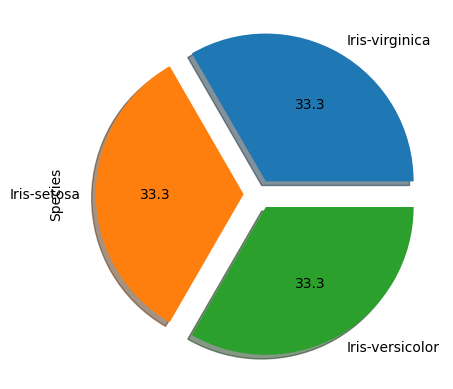

In [15]:
data.Species.value_counts().plot(kind = 'pie' , autopct = '%0.1f' , shadow = True , explode = [0.1,0.1,0.1])

In [19]:
list = data.columns[:-1]

SepalLengthCm


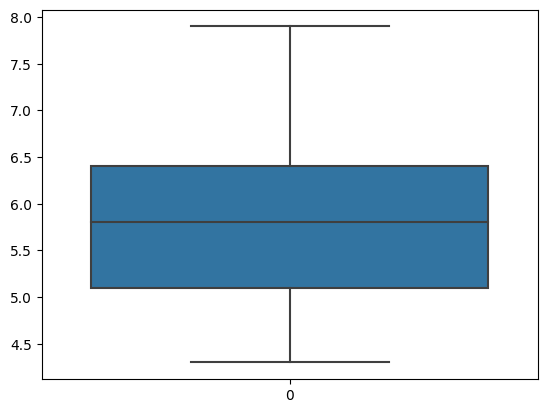

SepalWidthCm


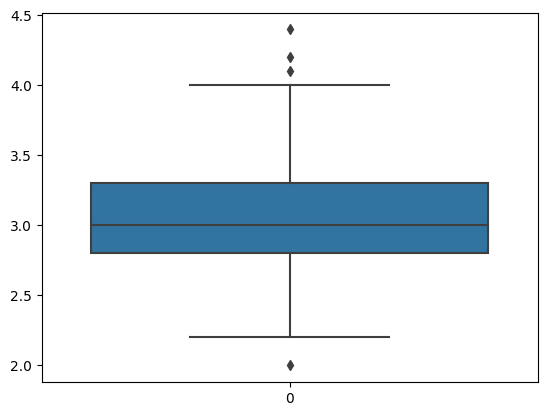

PetalLengthCm


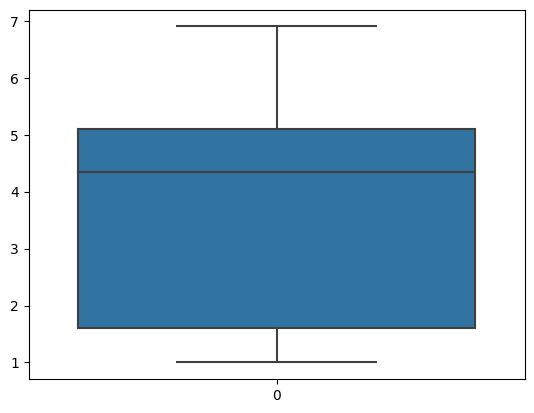

PetalWidthCm


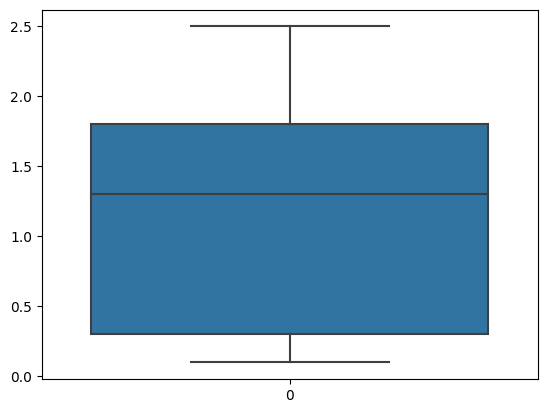

In [23]:
for i in list:
    print(i)
    sns.boxplot(data[i])
    plt.show()

SepalLengthCm


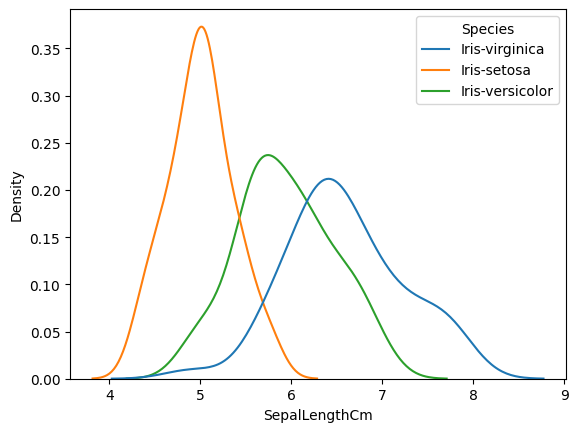

SepalWidthCm


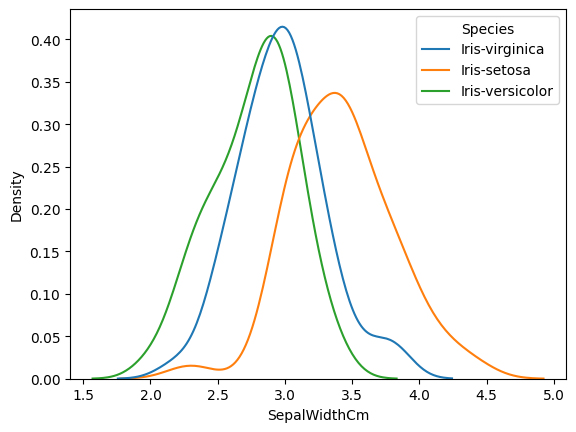

PetalLengthCm


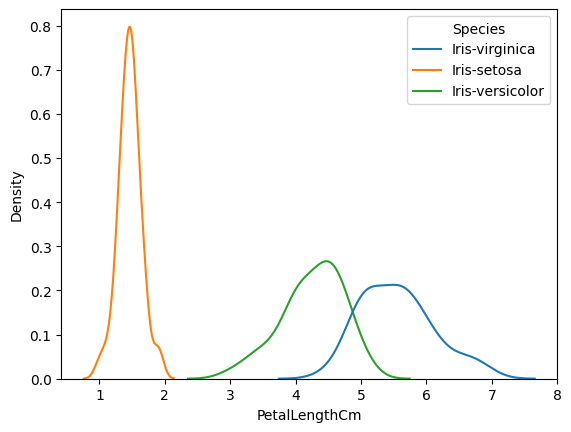

PetalWidthCm


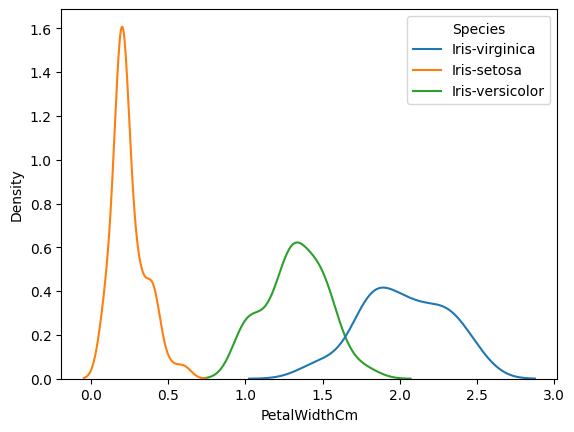

In [63]:
for i in list:
    print(i)
    sns.kdeplot(x = data[i] , hue = data.Species)
    plt.show()

SepalLengthCm


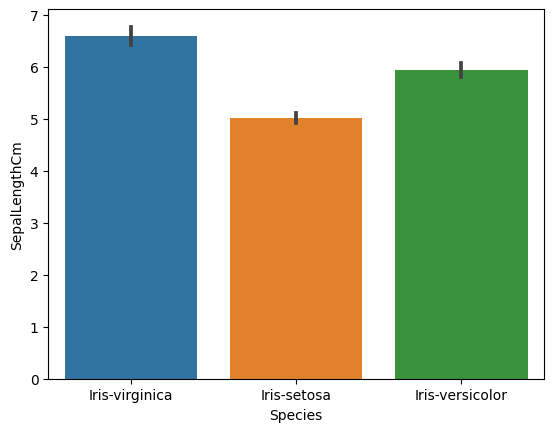

SepalWidthCm


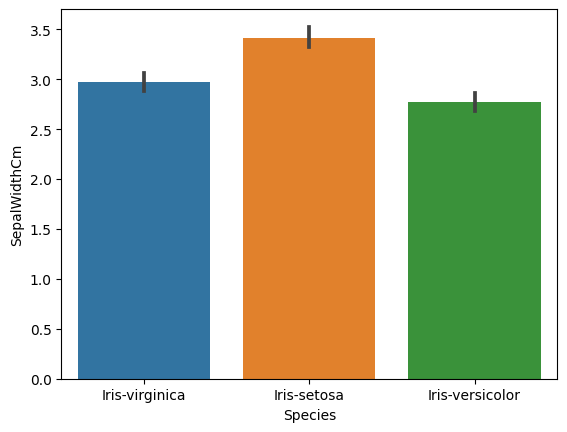

PetalLengthCm


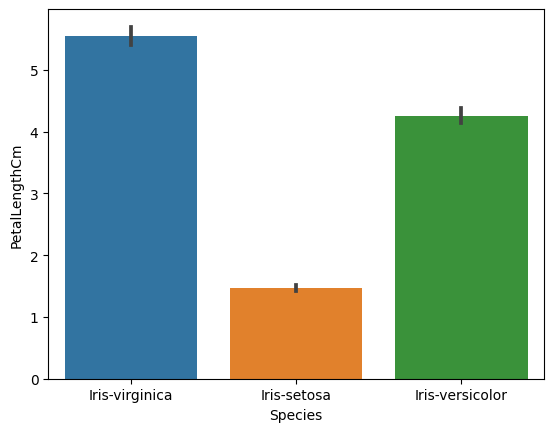

PetalWidthCm


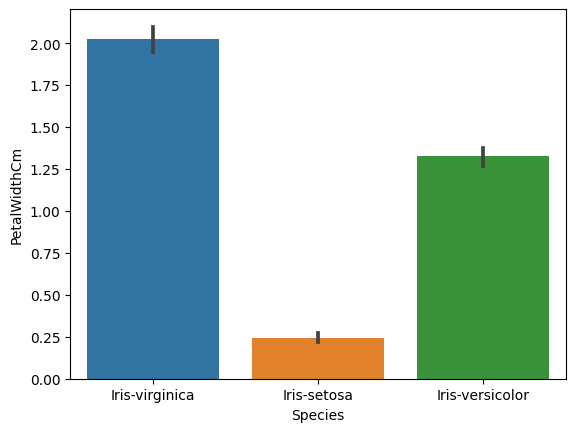

In [33]:
for i in list:
    print(i)
    sns.barplot(x = data.Species , y = data[i])
    plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_2172\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<AxesSubplot: >

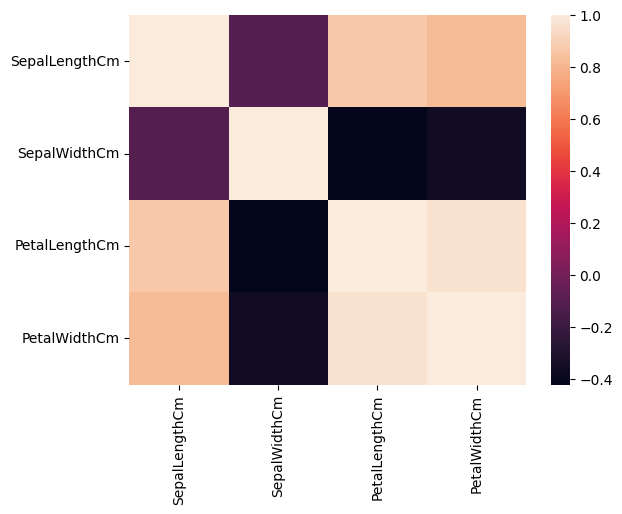

In [37]:
sns.heatmap(data.corr())

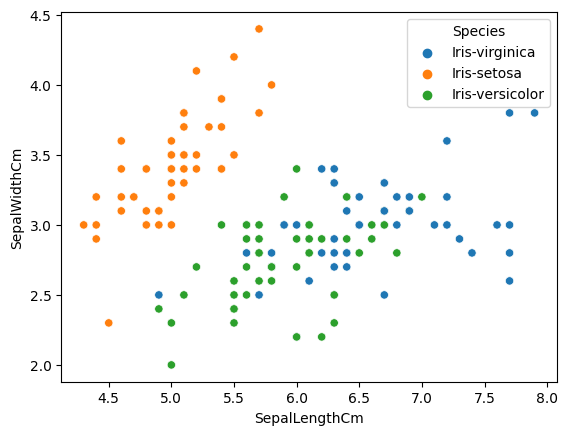

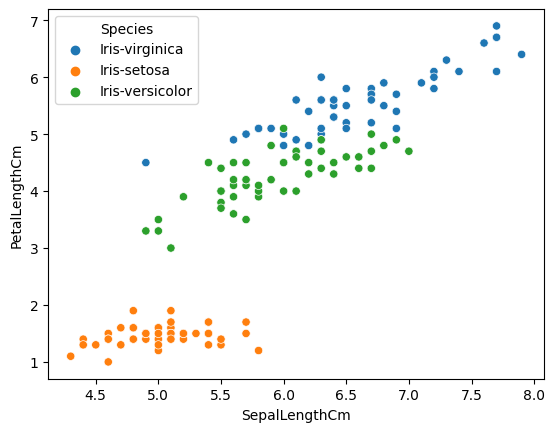

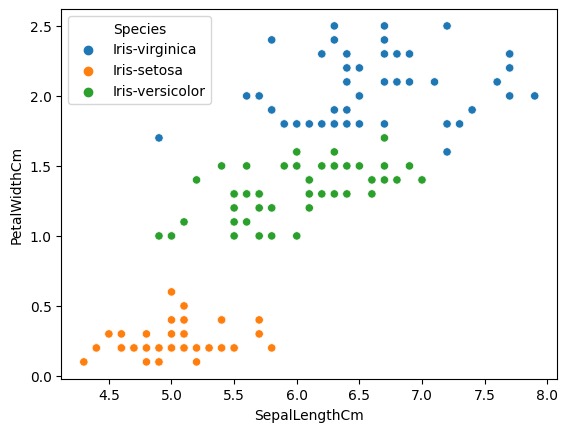

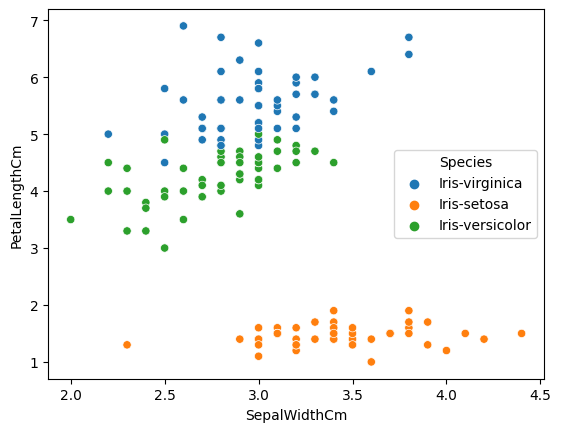

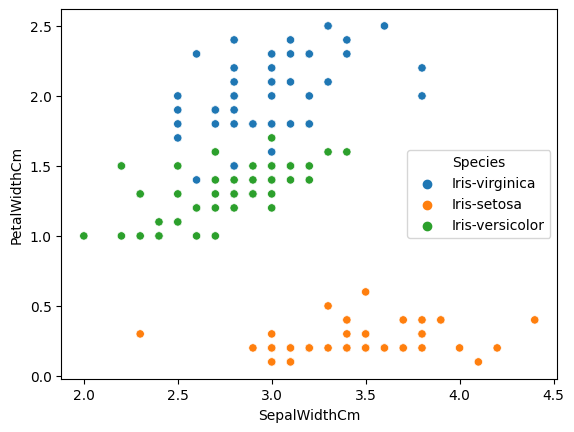

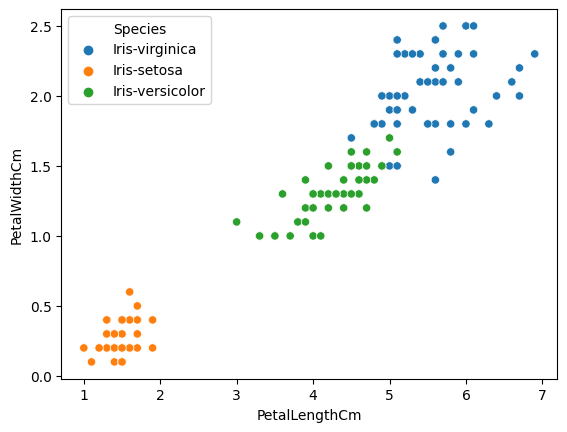

In [70]:
for i in range(4):
    for j in range(i + 1,4):
            sns.scatterplot(x = data[list[i]] , y = data[list[j]] , hue = data.Species) 
            plt.show()

In [38]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
146,6.3,2.5,5.0,1.9,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
15,5.7,4.4,1.5,0.4,Iris-setosa
147,6.5,3.0,5.2,2.0,Iris-virginica
87,6.3,2.3,4.4,1.3,Iris-versicolor


In [39]:
x = data.drop("Species" , axis = 1)
y = data.Species

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [43]:
xtrain , xtest , ytrain , ytest = train_test_split(x , y, test_size = 0.2 , random_state = 42)

In [45]:
rf = RandomForestClassifier()
rf.fit(xtrain , ytrain)
ypred = rf.predict(xtest)
accuracy_score(ytest , ypred)

0.9666666666666667

In [49]:
gb = GradientBoostingClassifier()
gb.fit(xtrain , ytrain)
ypred2 = gb.predict(xtest)
accuracy_score(ytest , ypred2)

0.9333333333333333

In [51]:
svc = SVC()
svc.fit(xtrain , ytrain)
ypred3 = svc.predict(xtest)
accuracy_score(ytest , ypred3)

0.9666666666666667

In [54]:
lr = LogisticRegression()
lr.fit(xtrain , ytrain)
ypred4 = lr.predict(xtest)
accuracy_score(ytest , ypred4)

C:\Python 310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0